# Welcome

Hi everyone! This is my first competition on Kaggle as I'm on my journey to improve my skills as a data scientist.

# Introduction

Here is a description of all the variables in the dataset according to the source of the data itself:

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* BedroomAbvGr: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

As mentioned, we will by trying to predict the **SalesPrice** using the other variables that are available to us in the dataset. In this analysis, I will first conduct some exploratory data analysis (EDA) to see if we can try to find some patterns in the dataset to help us build a better model to predict SalesPrice. After conducting EDA, I will then move on to cleaning the data as much as needed. Finally, I will be using scikit-learn to create a linear regression model that will be used to predict SalesPrice as wanted. I am aiming for 95%+ accurate model (edit: this was way too ambitious in hindsight but I like where my mind was at).

**Disclaimer**: Parts of this notebook were inspired by Kumod Sharma's notebook found [here](https://www.kaggle.com/code/kdsharma/predicting-house-price-90-accuracy#%E2%9C%A8-Predicting-House-Price-%E2%9C%A8). These parts are mostly found in the EDA section in which I used his code as inspiration to make my graphs look neater. Aside from a few lines of code here and there, every other part of the notebook was done by my own thinking and my own (beginner) skills with data analysis. That being said, a big shoutout to Kumod Sharma for contributing a wonderful notebook for the community.

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,explained_variance_score

# Load Data

In [2]:
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
sample = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

# Basic look at the data

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [7]:
# Categorical features
cat_features = train.select_dtypes(include = 'object').columns

# Continous numerical features
cont_num_features = ["LotFrontage","LotArea","YearBuilt","YearRemodAdd","MasVnrArea","BsmtFinSF1",
                     "BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF",
                     "GrLivArea","GarageYrBlt","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch",
                     "3SsnPorch","ScreenPorch","PoolArea","MiscVal"]

# Discrete numerical features
disc_num_features = ["MSSubClass", "OverallQual","OverallCond","BsmtFullBath","BsmtHalfBath",
                     "FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd",
                     "Fireplaces","GarageCars","MoSold", "YrSold"]

# Exploratory Data Analysis (EDA)
## Univariate Analysis

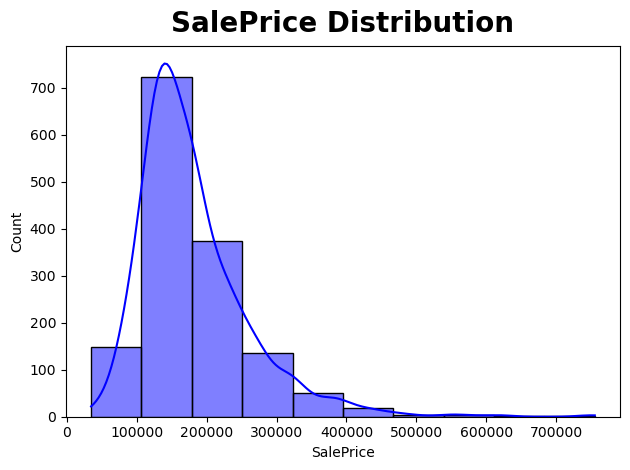

In [8]:
sns.histplot(train['SalePrice'],bins=10,kde=True,color="blue")
plt.title("SalePrice Distribution",fontweight="black",size=20,pad=10)
plt.tight_layout()

Observations:
* We can see that *SalePrice* is slightly skewed to the left 
* The mean is around 150k. 

## Bivariate Analysis wrt SalePrice

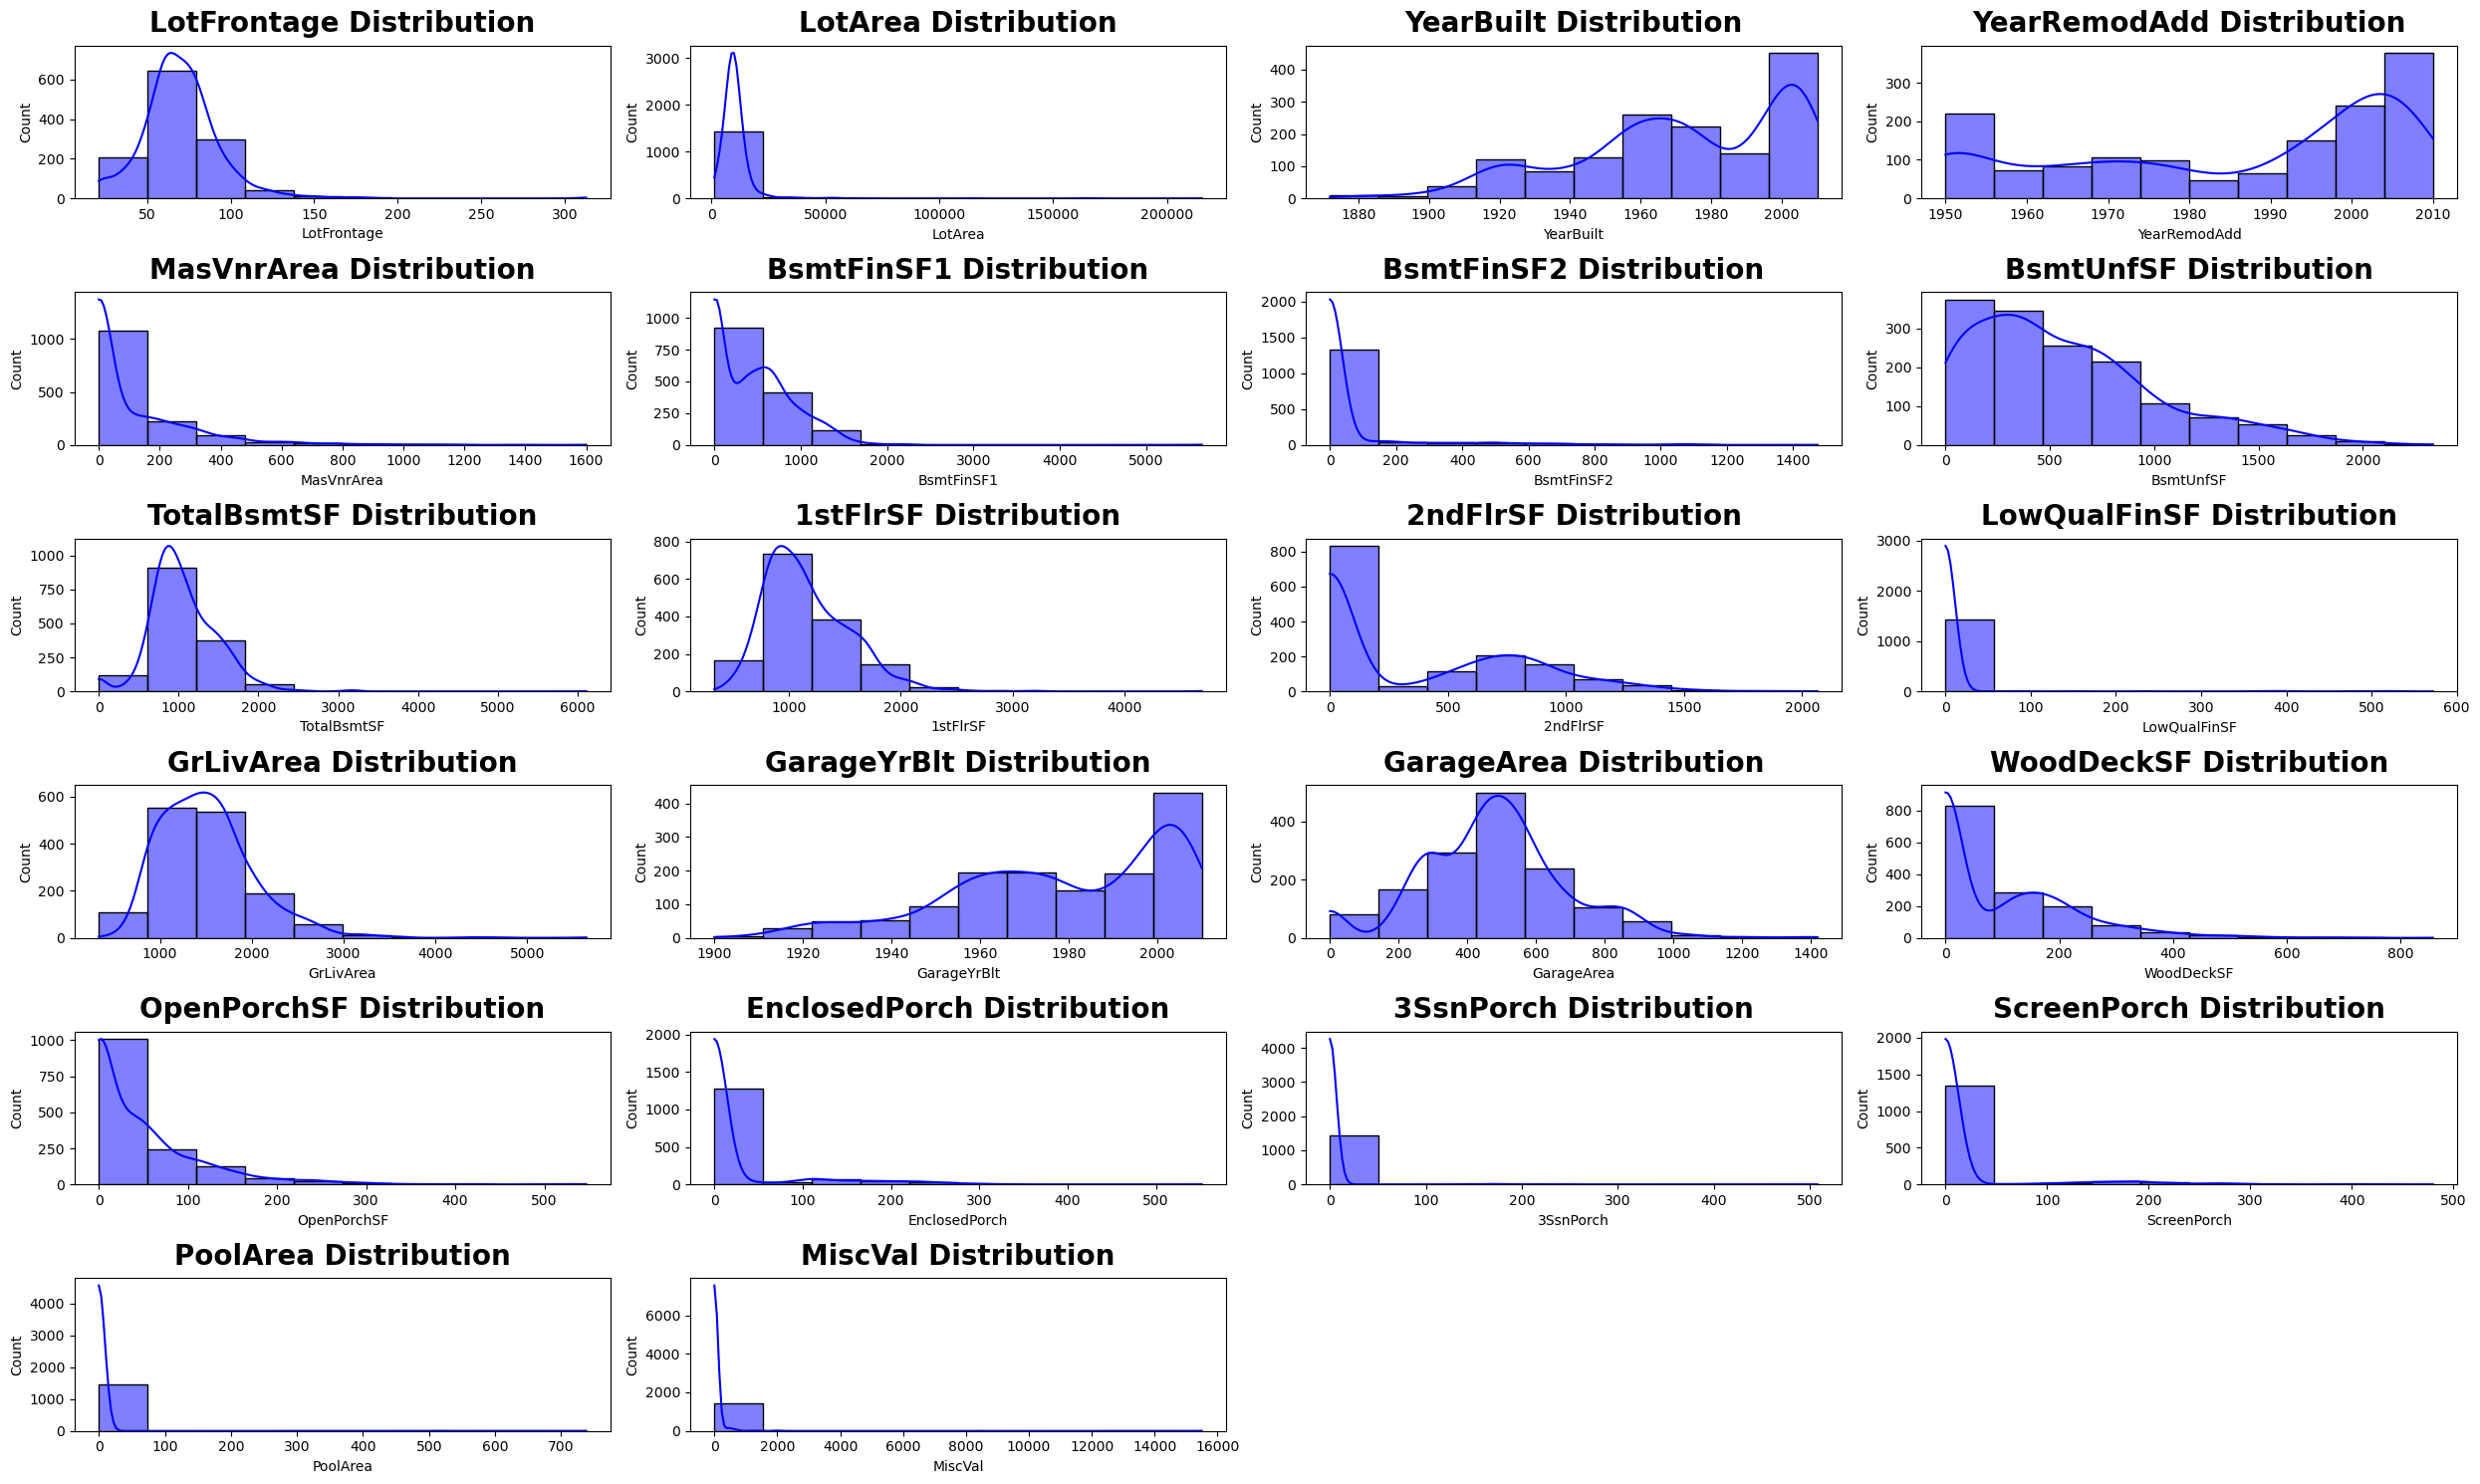

In [9]:
# Continuous numerical features distribution
plt.figure(figsize=(25,15))
for index,column in enumerate(cont_num_features):
    plt.subplot(6,4,index+1)
    sns.histplot(train[column],bins=10,kde=True,color="blue")
    plt.title(f"{column} Distribution",fontweight="black",size=20,pad=10)
    plt.tight_layout()

Observations:
* *LotArea*, *BsmtFinType2*, *LowQualFinSF*, *EnclosedPorch*, *3SsnPorch*, *ScreenPorch*, *PoolArea*, *MiscVal* are all features that are quite skewed to the right and have low counts. This may be due to the missing data in these features. Further exploration is required on these features later in the data cleaning section.
* There are also a few other features that are skewed to the right. This indicates that our numerical features are quite skewed in general and should be explored later in regards to their skewness. Perhaps we will drop some of the features that are too skewed.
* *GarageArea* has a normal distribution. I'm not sure what this would mean for the model that will be created later.

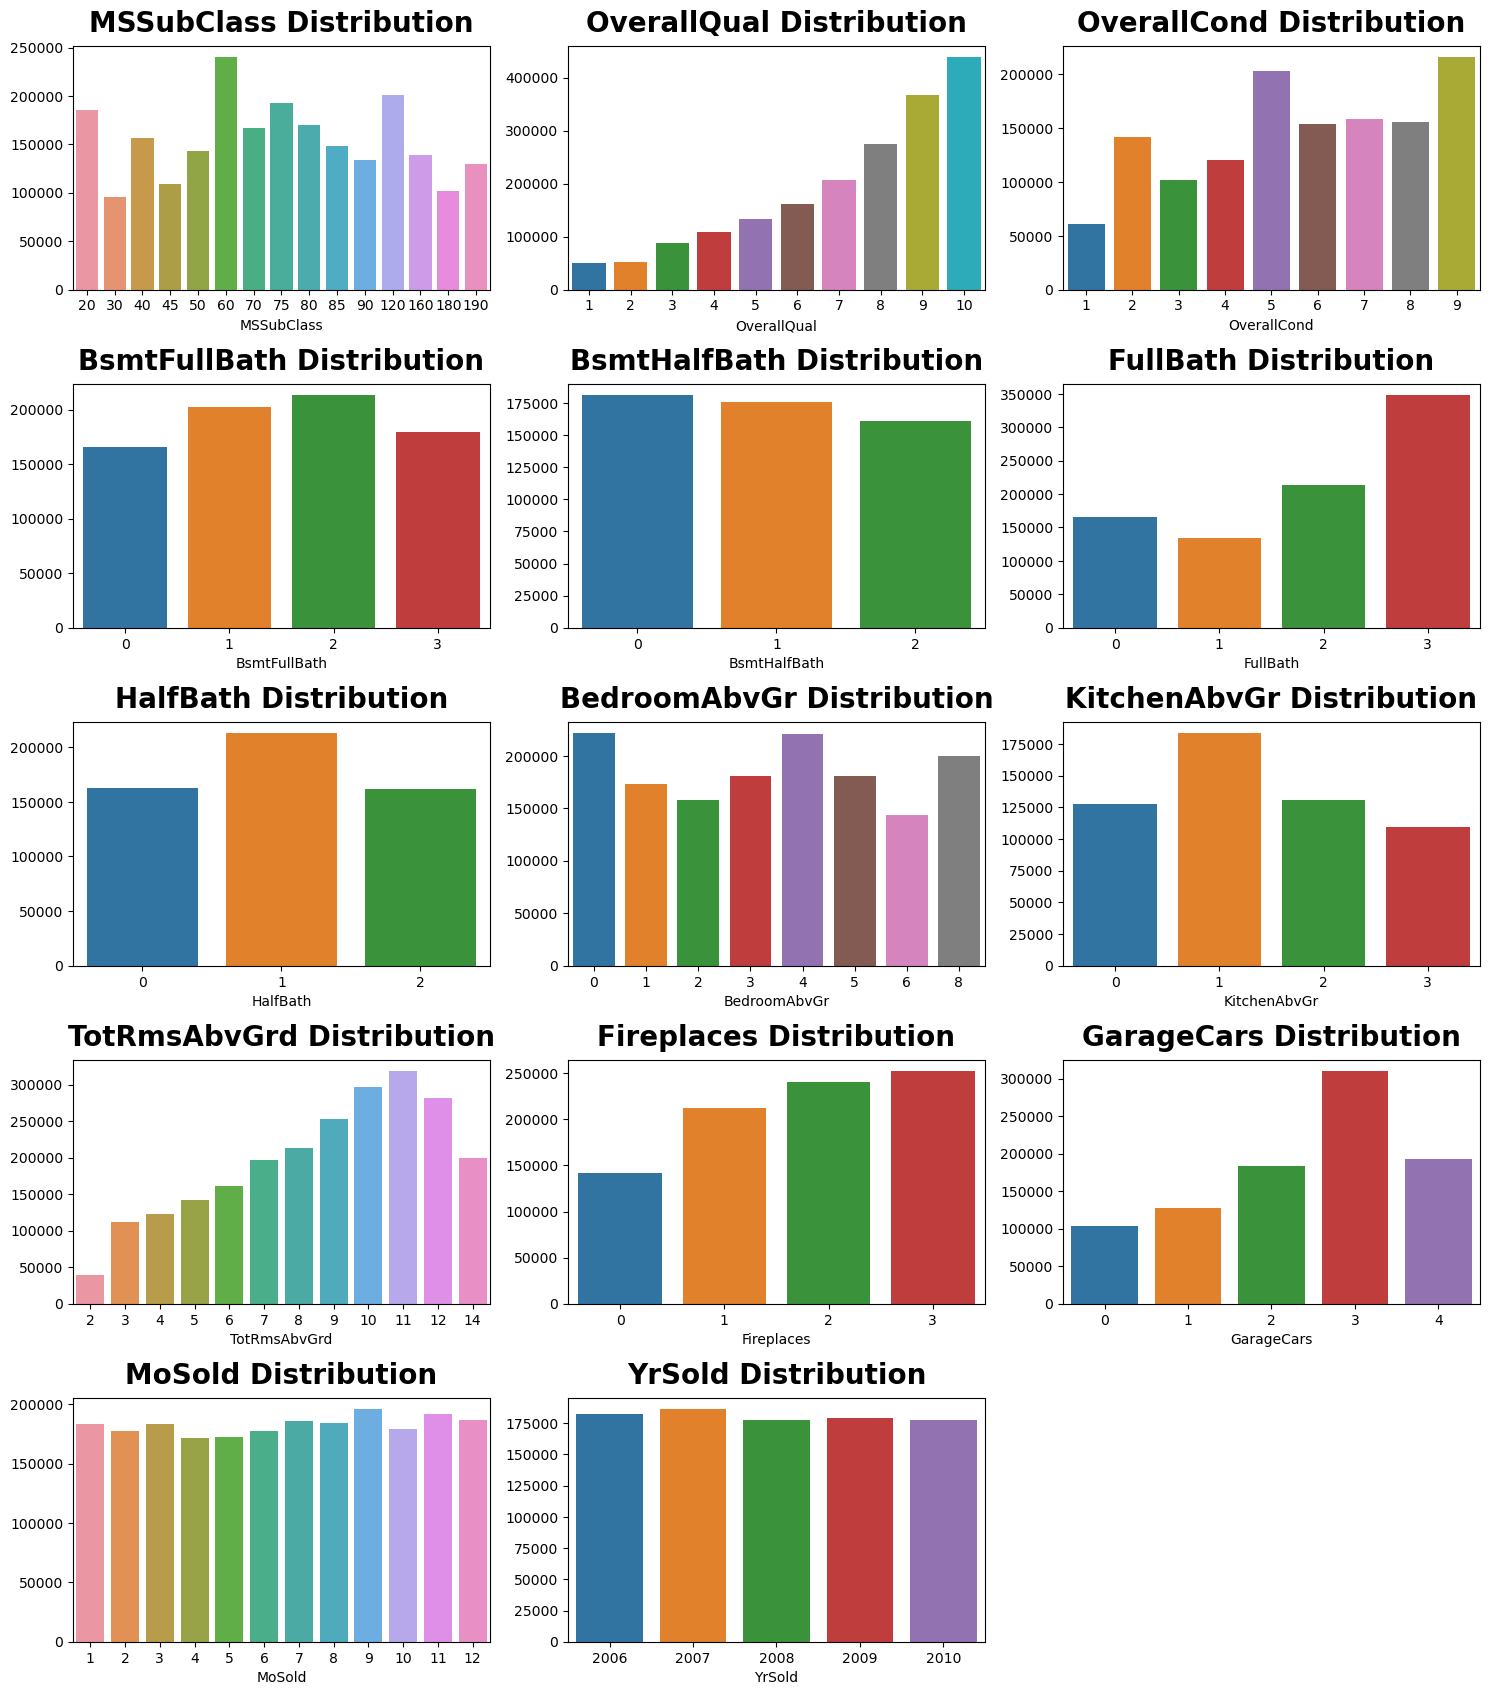

In [10]:
# Discrete numerical features distribution
plt.figure(figsize=(15,20))
for index,column in enumerate(disc_num_features):
    mean = train.groupby(column)["SalePrice"].mean()
    plt.subplot(6,3,index+1)
    sns.barplot(x = mean.index, y = mean.values)
    plt.title(f"{column} Distribution",fontweight="black",size=20,pad=10)
    plt.tight_layout()

Observations:
* Nothing in these set of features seem to be out of the ordinary.
* We can see a positive correlation between *OverallQual* and *SalePrice*. Same applies to *TotRmsAbvGrd* and *SalePrice*.

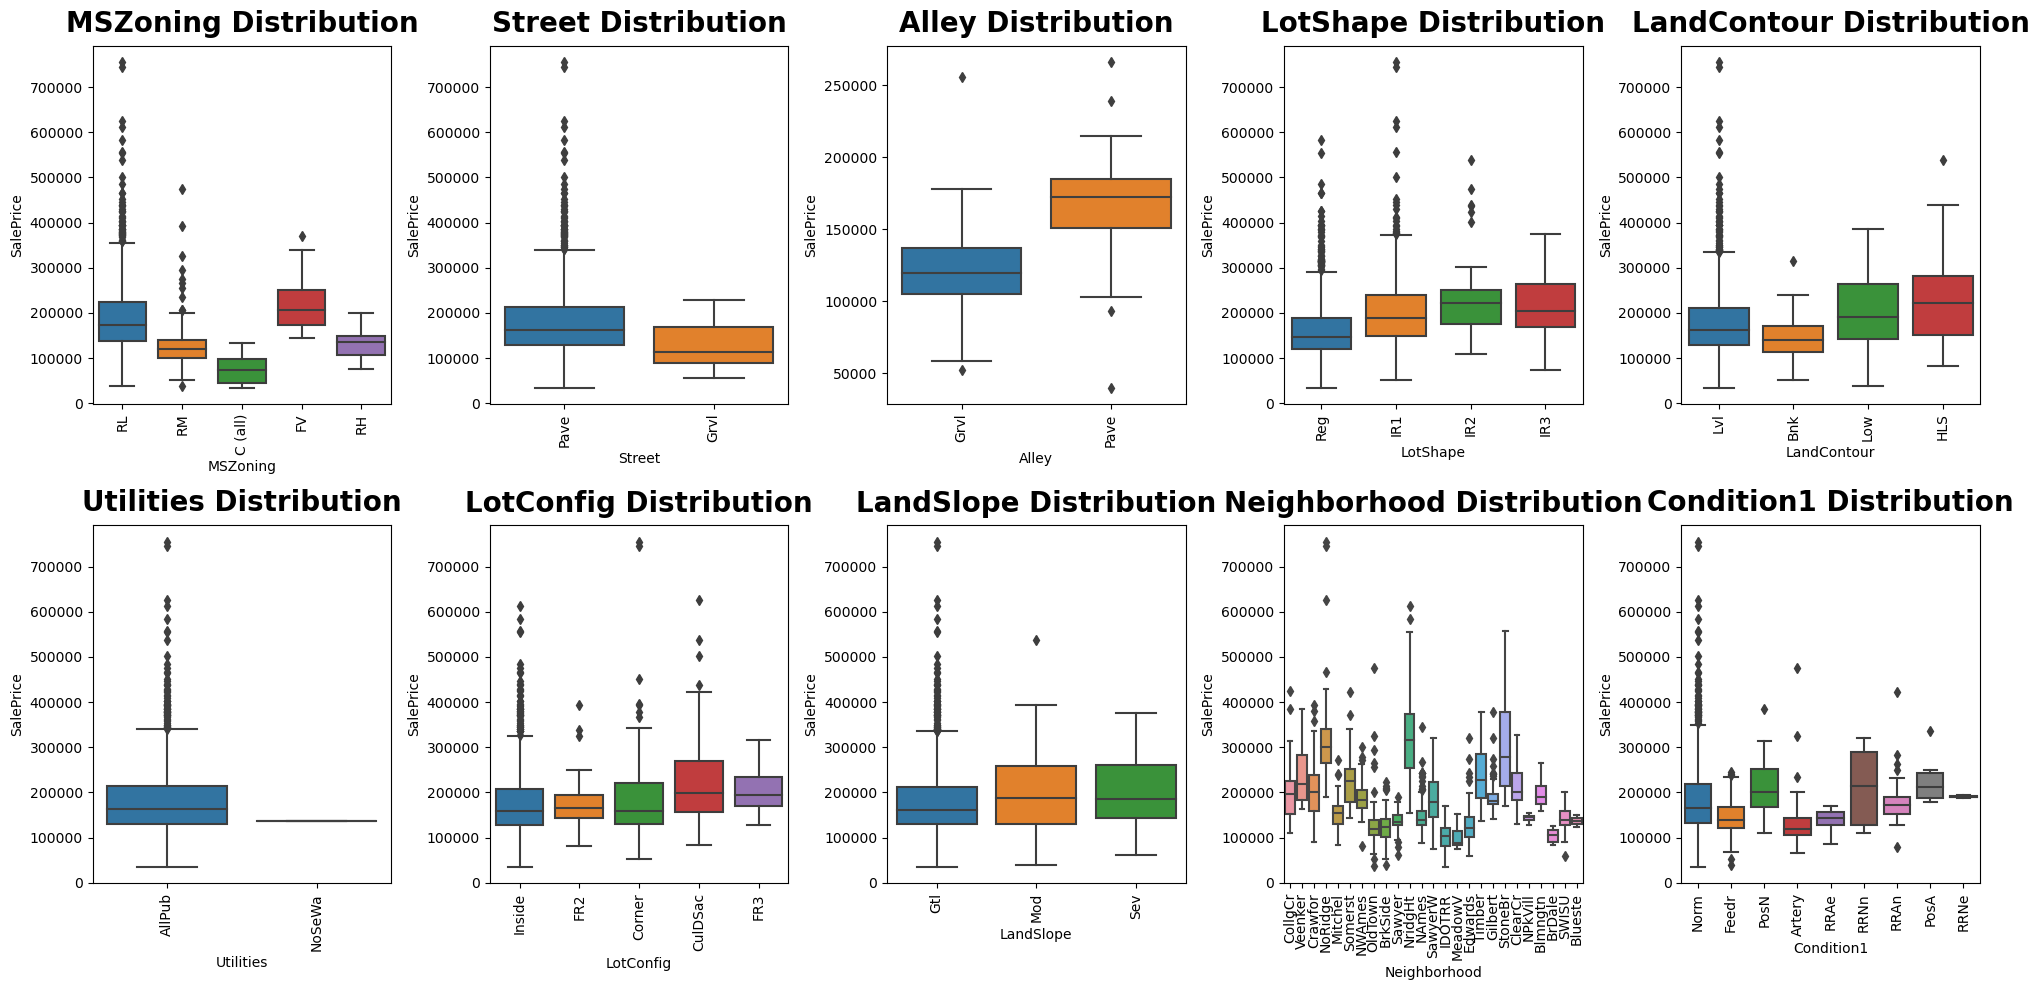

In [11]:
# Categorical features (0-9) distribution
plt.figure(figsize=(20,10))
for index,column in enumerate(cat_features[:10]):
    plt.subplot(2,5, index+1)
    sns.boxplot(train, x = column ,y = 'SalePrice')
    plt.title(f"{column} Distribution",fontweight="black",size=20,pad=10)
    plt.xticks(rotation = 90)
    plt.tight_layout()

Observations:
* *Utilities* has a high class imbalance, so we will drop this feature later on.
* *Neighborhood* has high cardinality, but there is no other way to group them to reduce the cardinality. So, we will leave it be.

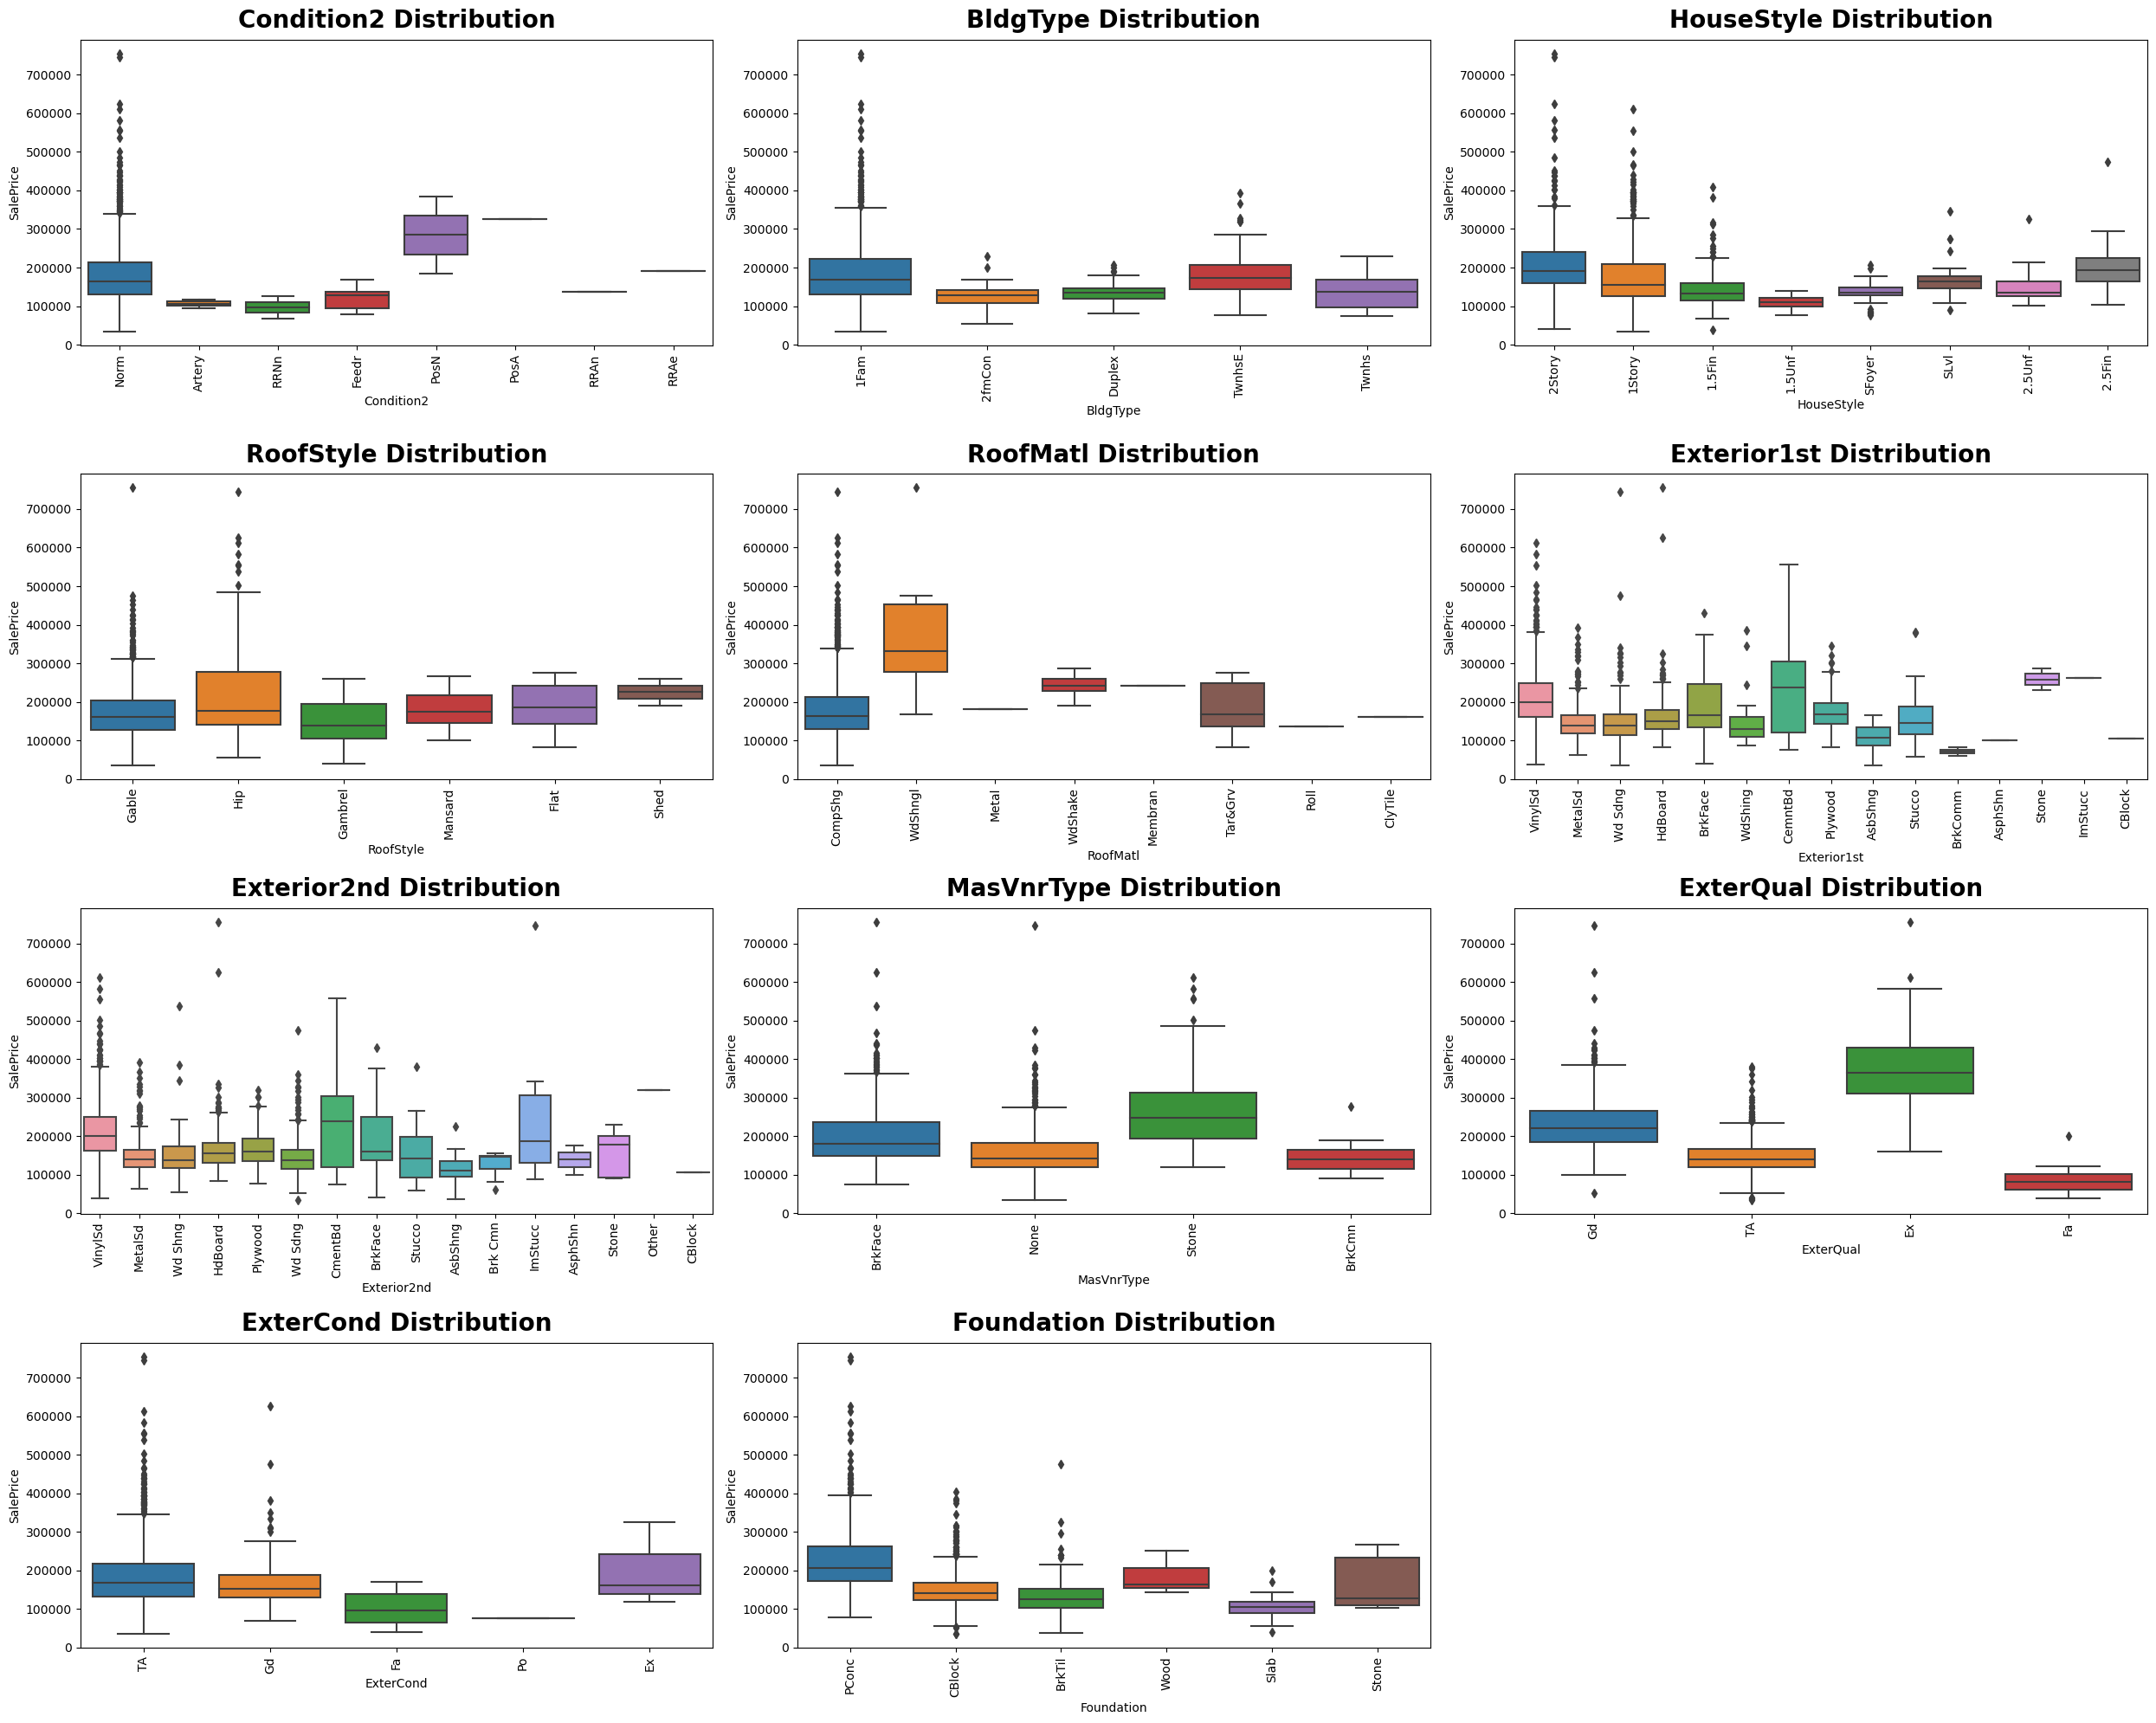

In [12]:
# Categorical features (10-20) distribution
plt.figure(figsize=(25,20))
for index,column in enumerate(cat_features[10:21]):
    plt.subplot(4,3, index+1)
    sns.boxplot(train, x = column ,y = 'SalePrice')
    plt.title(f"{column} Distribution",fontweight="black",size=20,pad=10)
    plt.xticks(rotation = 90)
    plt.tight_layout()

Observations:
* *Condition2* has a high class imbalance, so we will drop this feature later.
* *RoofMatl* has a high class imbalance, so we will drop this feature later.
* Both *Exterior1st* and *ExterCond* can also be seen to have some slight class imbalance, but not to the extent of *Condition2* and *RoofMatl*. Therefore, we will leave these features in the model.

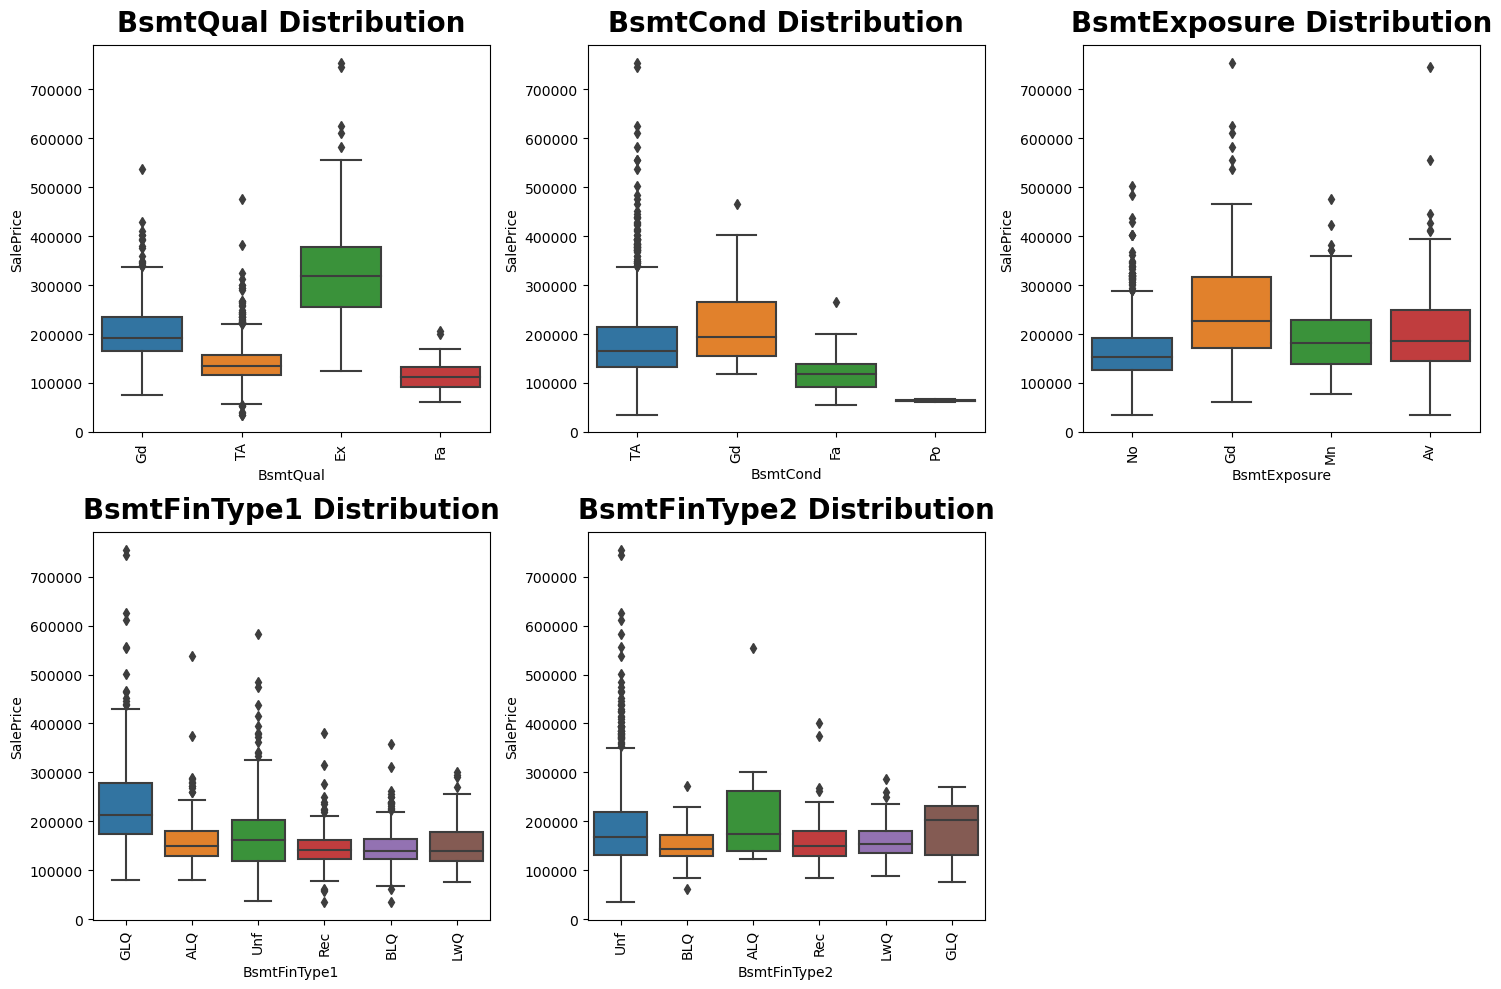

In [13]:
# Categorical features (Basement features) distribution
plt.figure(figsize=(15,10))
for index,column in enumerate(cat_features[21:26]):
    plt.subplot(2,3, index+1)
    sns.boxplot(train, x = column ,y = 'SalePrice')
    plt.title(f"{column} Distribution",fontweight="black",size=20,pad=10)
    plt.xticks(rotation = 90)
    plt.tight_layout()

Observation:
* *BsmtCond* seems to have some class imbalance but not too much. So, we will leave it be.
* All the other basement features seem to be in good condition.

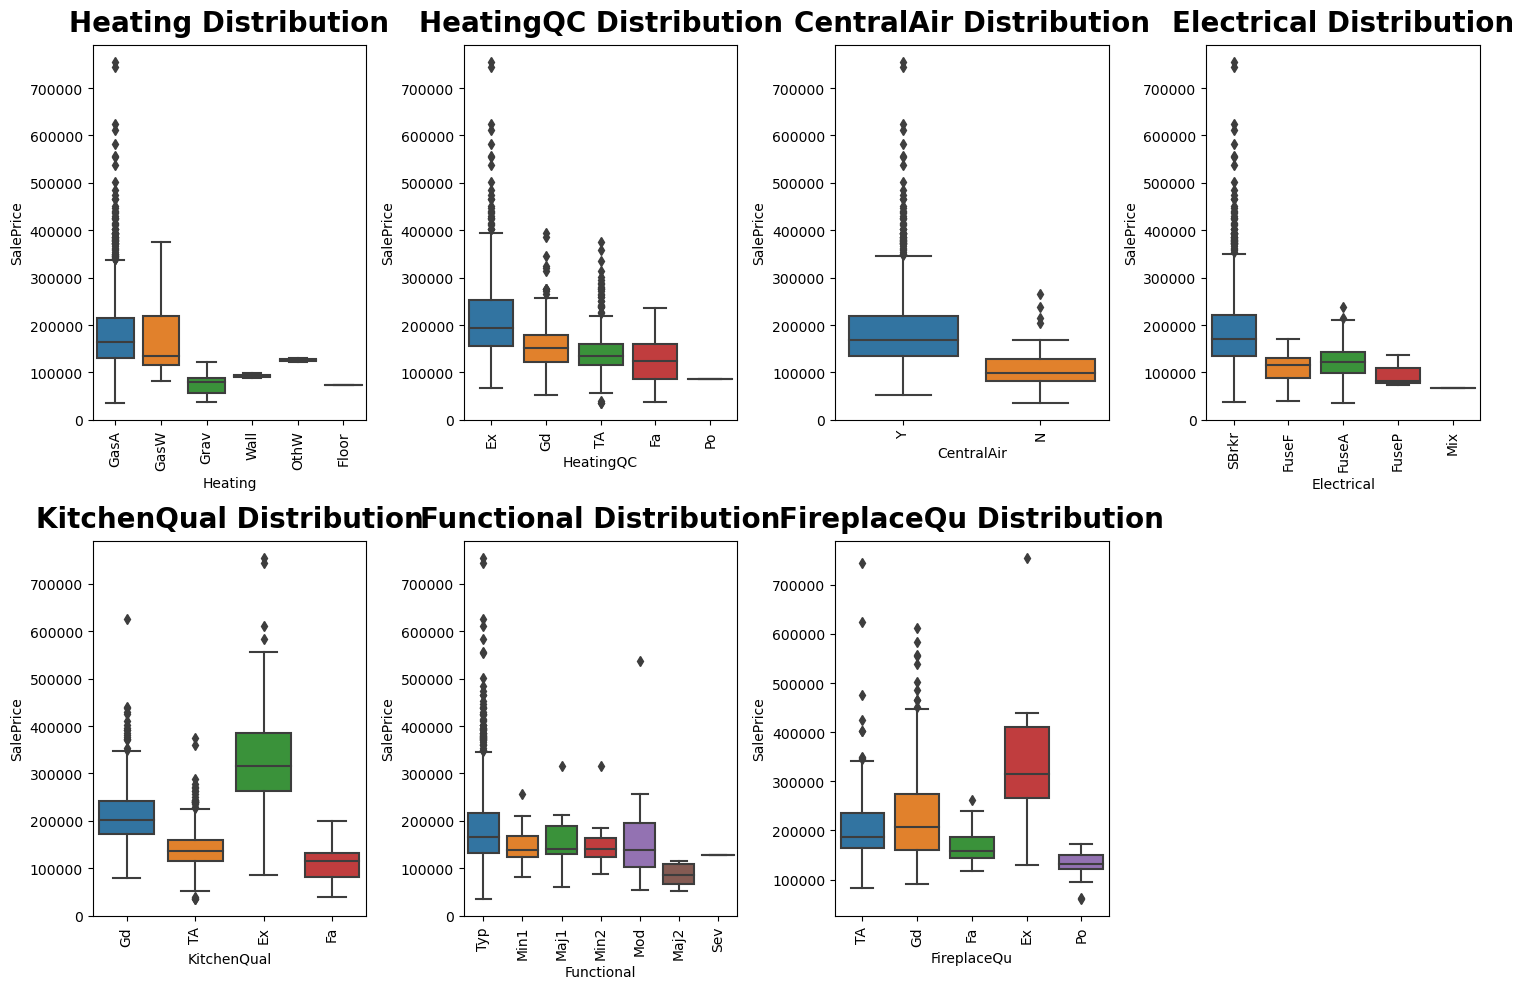

In [14]:
# Categorical features (26-32) distribution
plt.figure(figsize=(15,10))
for index,column in enumerate(cat_features[26:33]):
    plt.subplot(2,4, index+1)
    sns.boxplot(train, x = column ,y = 'SalePrice')
    plt.title(f"{column} Distribution",fontweight="black",size=20,pad=10)
    plt.xticks(rotation = 90)
    plt.tight_layout()

Observations:
* *Heating* seems to have a high class imbalance, so we will be dropping this feature later.
* *Electrical* has some high class imbalance, but not too much. So, we will leave it be.
* All the other features seem to be in good condition.

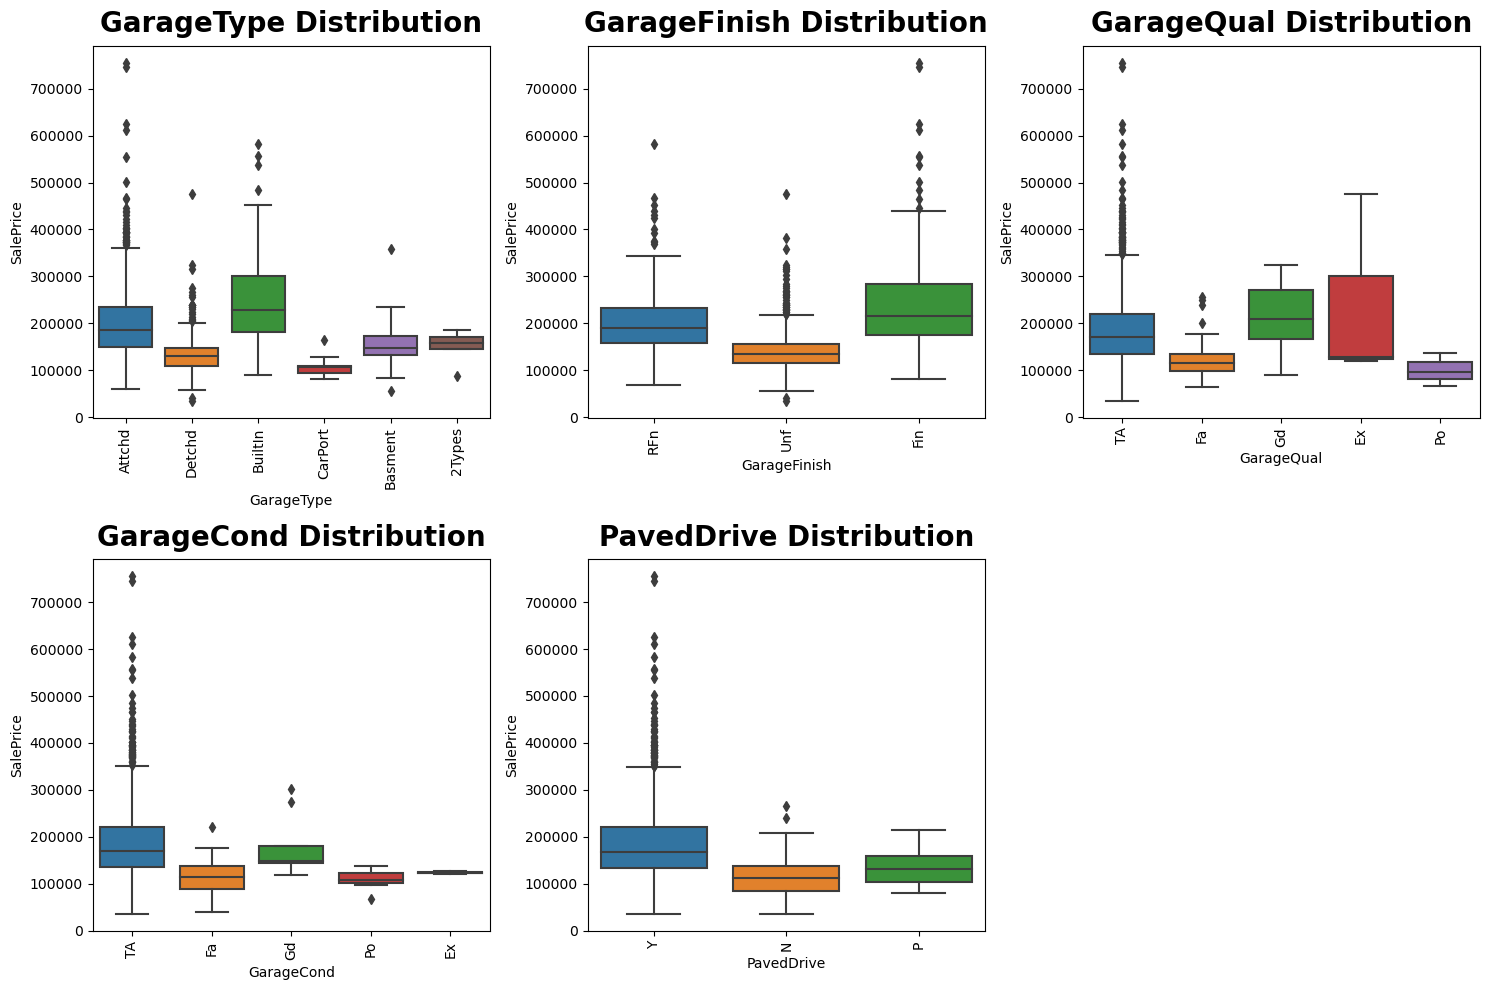

In [15]:
# Categorical features (Garage features) distribution
plt.figure(figsize=(15,10))
for index,column in enumerate(cat_features[33:38]):
    plt.subplot(2,3, index+1)
    sns.boxplot(train, x = column ,y = 'SalePrice')
    plt.title(f"{column} Distribution",fontweight="black",size=20,pad=10)
    plt.xticks(rotation = 90)
    plt.tight_layout()

Observations:
* *GarageCond* seems to have some class imbalance, but not too much. So, we will leave it be.
* All the other features seem to be in good condition.

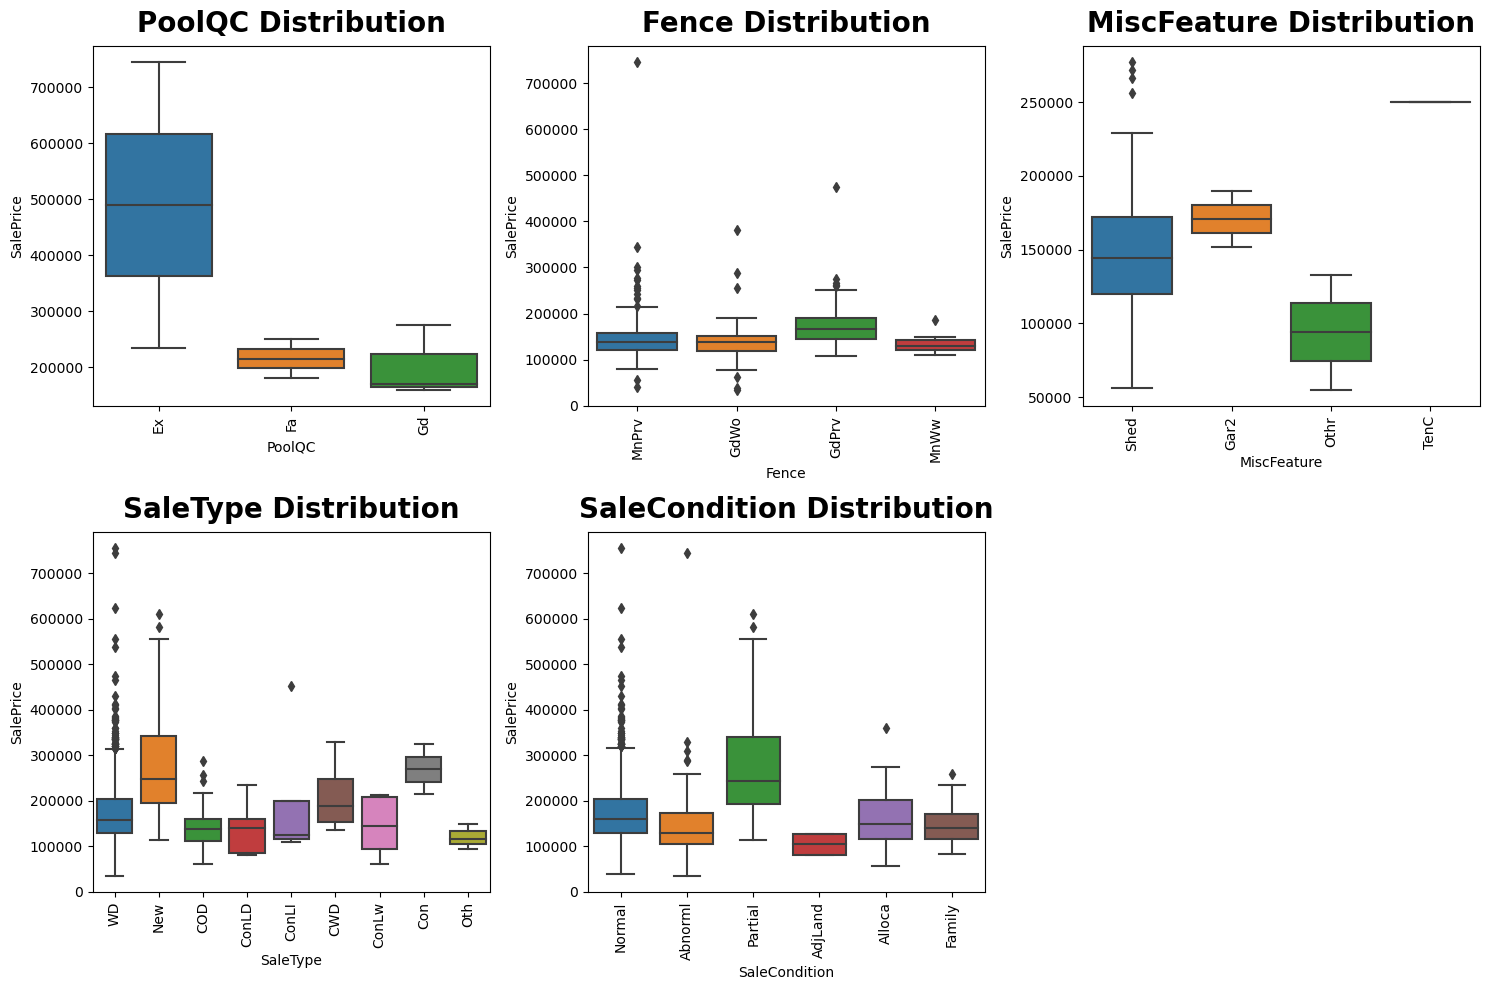

In [16]:
# Categorical features (38-43) distribution
plt.figure(figsize=(15,10))
for index,column in enumerate(cat_features[38:]):
    plt.subplot(2,3, index+1)
    sns.boxplot(train, x = column ,y = 'SalePrice')
    plt.title(f"{column} Distribution",fontweight="black",size=20,pad=10)
    plt.xticks(rotation = 90)
    plt.tight_layout()

Observations:
* *MiscFeature* seems to have some class imbalance as well as a very low count which may be explained due to missing values. Further analysis will be done later and we might drop this feature due to the missing values.
* All the other features seem to be in good condition.

## Correlation

In [17]:
# Appending SalePrice to see the correlation with the other continuous numerical features
cont_num_features.append("SalePrice")

<Axes: >

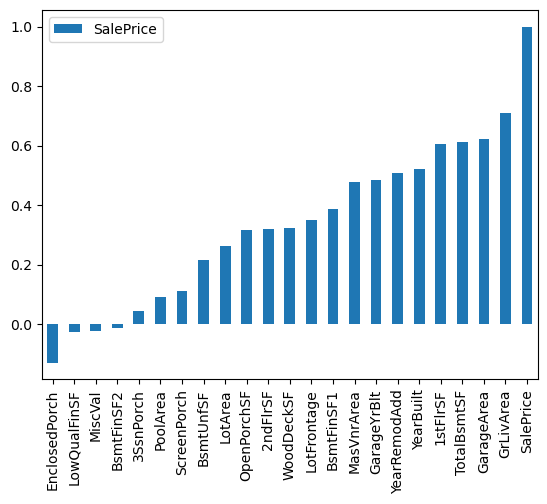

In [18]:
# Displaying the correlation of all the continuous numerical features with SalePrice in a bar chart
correlation = train[cont_num_features].corr()['SalePrice'].sort_values(ascending = True)
correlation = pd.DataFrame(correlation)
correlation.plot(kind = 'bar')

*LowQualFinSF*, *MiscVal*, and *BsmtFinSF2* all have a very low correlation with *SalePrice*. Because of this, we will be dropping these features later on.

## Skewness

<Axes: >

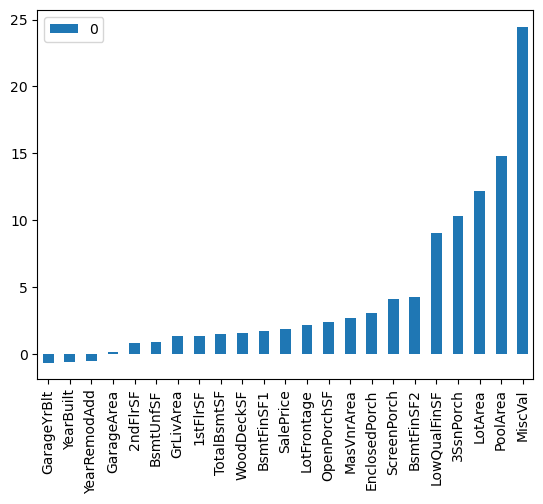

In [19]:
# Displaying the correlation of all the continuous numerical features with SalePrice in a bar chart
skewness = train[cont_num_features].skew().sort_values(ascending = True)
skewness = pd.DataFrame(skewness)
skewness.plot(kind = 'bar')

We can see that *MiscVal*, *PoolArea*, *LotArea*, *3SsnPorch*, and *LowQualFinSF* are incredibly skewed which would affect the model. We will be dropping these features.

# Data Cleaning
## Dropping Features
I will be dropping the features that have been indicated to be dropped from the EDA.

In [20]:
# Dropping features with high class imbalance
train.drop(['Utilities', 'Condition2', 'RoofMatl', 'Heating'], axis=1, inplace=True)
test.drop(['Utilities', 'Condition2', 'RoofMatl', 'Heating'], axis=1, inplace=True)

# Dropping feature with low correlation to SalePrice
train.drop(['LowQualFinSF', 'MiscVal', 'BsmtFinType2'], axis=1, inplace=True)
test.drop(['LowQualFinSF', 'MiscVal', 'BsmtFinType2'], axis=1, inplace=True)

# Dropping feature with high skewness
train.drop(['PoolArea','3SsnPorch'], axis=1, inplace=True)
test.drop(['PoolArea','3SsnPorch'], axis=1, inplace=True)

## Numerical Features (Outlier Removal)
We will be finding outliers in *SalePrice* and remove them from the dataset. The reason for this is because these outliers have the chance to affect the linear regression model that we will build later on. We will be finding these outliers using the IQR method.

In [21]:
# Find min and max of SalePrice
minimum = train['SalePrice'].min()
maximum = train['SalePrice'].max()
    
# Calculate the upper and lower limits
Q1 = train['SalePrice'].quantile(0.25)
Q3 = train['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
outliers = np.where((train['SalePrice']>=upper) | (train['SalePrice']<=lower))[0]

# Eliminating the outlier rows
train.drop(outliers, axis=0, inplace = True)

## Missing Values
I will look into how many missing values there are for each feature. Then, I'd either remove the rows with missing values or drop the features themselves if they represent too much of the entire dataset.

In [22]:
# Displaying all the rows when prompted rather than cutting off the middle rows
pd.set_option('display.max_rows', None)

In [23]:
# Missing values for the train dataset
train.isnull().sum()[train.isnull().sum() > 0].sort_values(ascending = False)

PoolQC          1393
MiscFeature     1345
Alley           1308
Fence           1122
FireplaceQu      689
LotFrontage      256
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtCond          37
BsmtFinType1      37
BsmtQual          37
MasVnrArea         7
MasVnrType         7
Electrical         1
dtype: int64

In [24]:
# Missing values for the test dataset
test.isnull().sum()[test.isnull().sum() > 0].sort_values(ascending = False)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageYrBlt       78
GarageFinish      78
GarageQual        78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
Functional         2
BsmtHalfBath       2
KitchenQual        1
TotalBsmtSF        1
GarageCars         1
GarageArea         1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64

<Axes: >

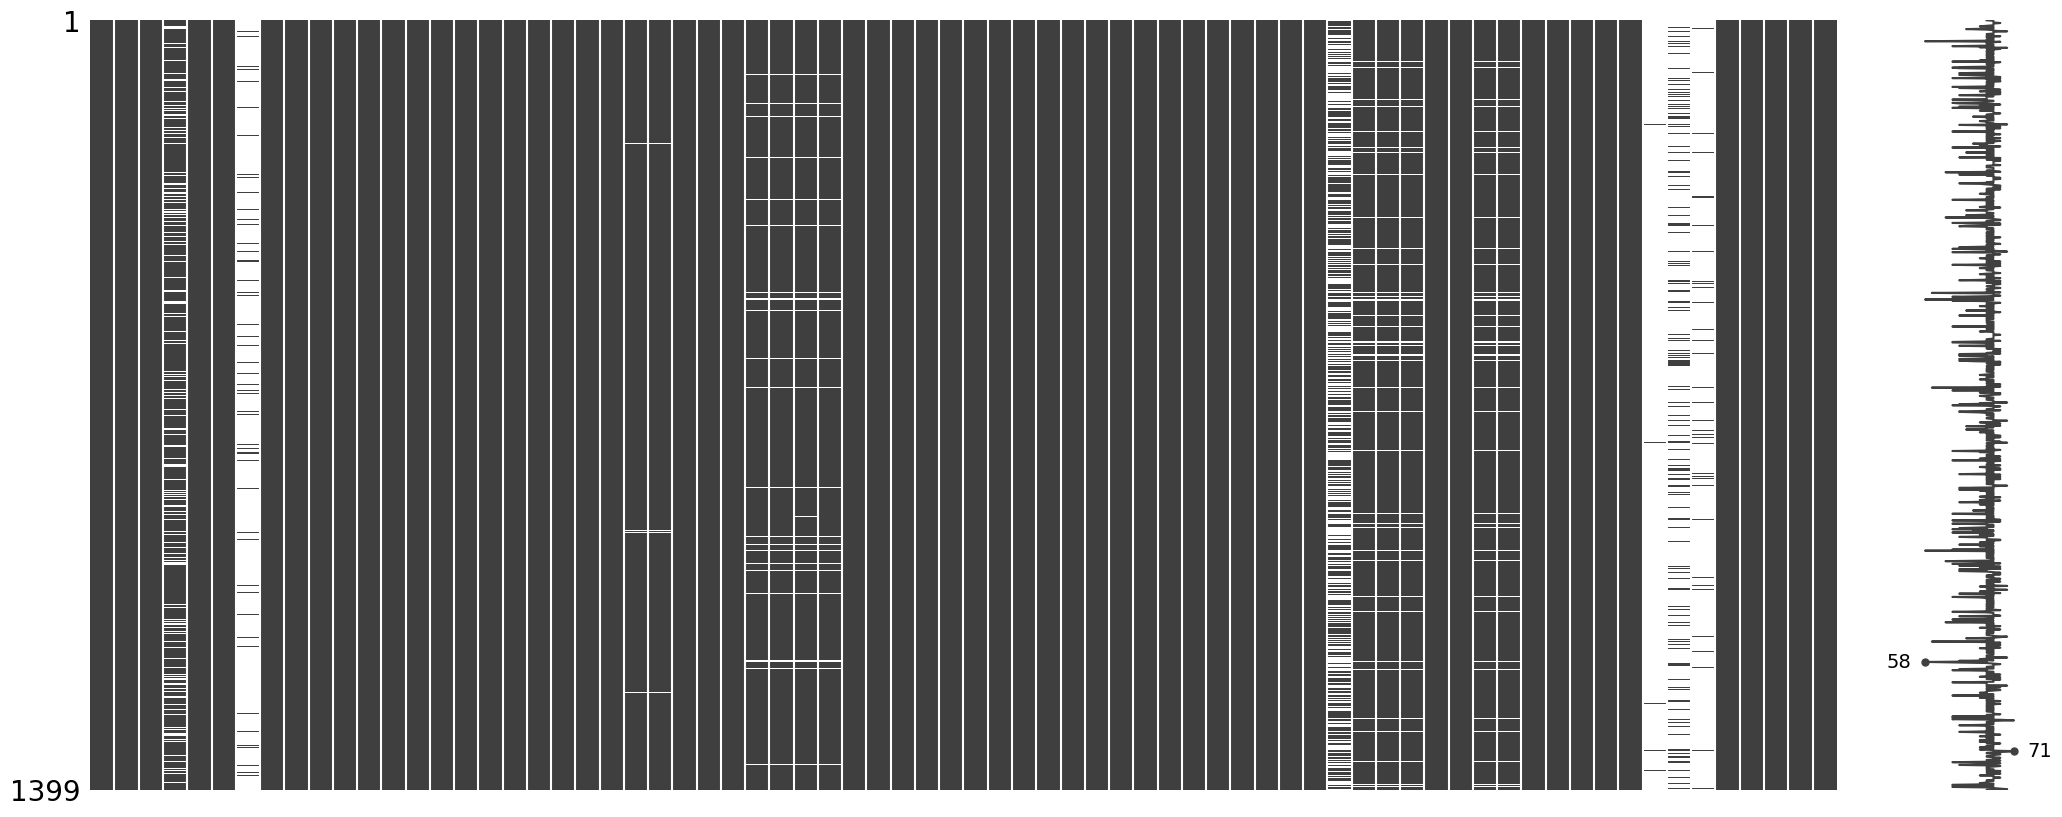

In [25]:
# Visualizing the missing data for the train dataset
msno.matrix(train)

<Axes: >

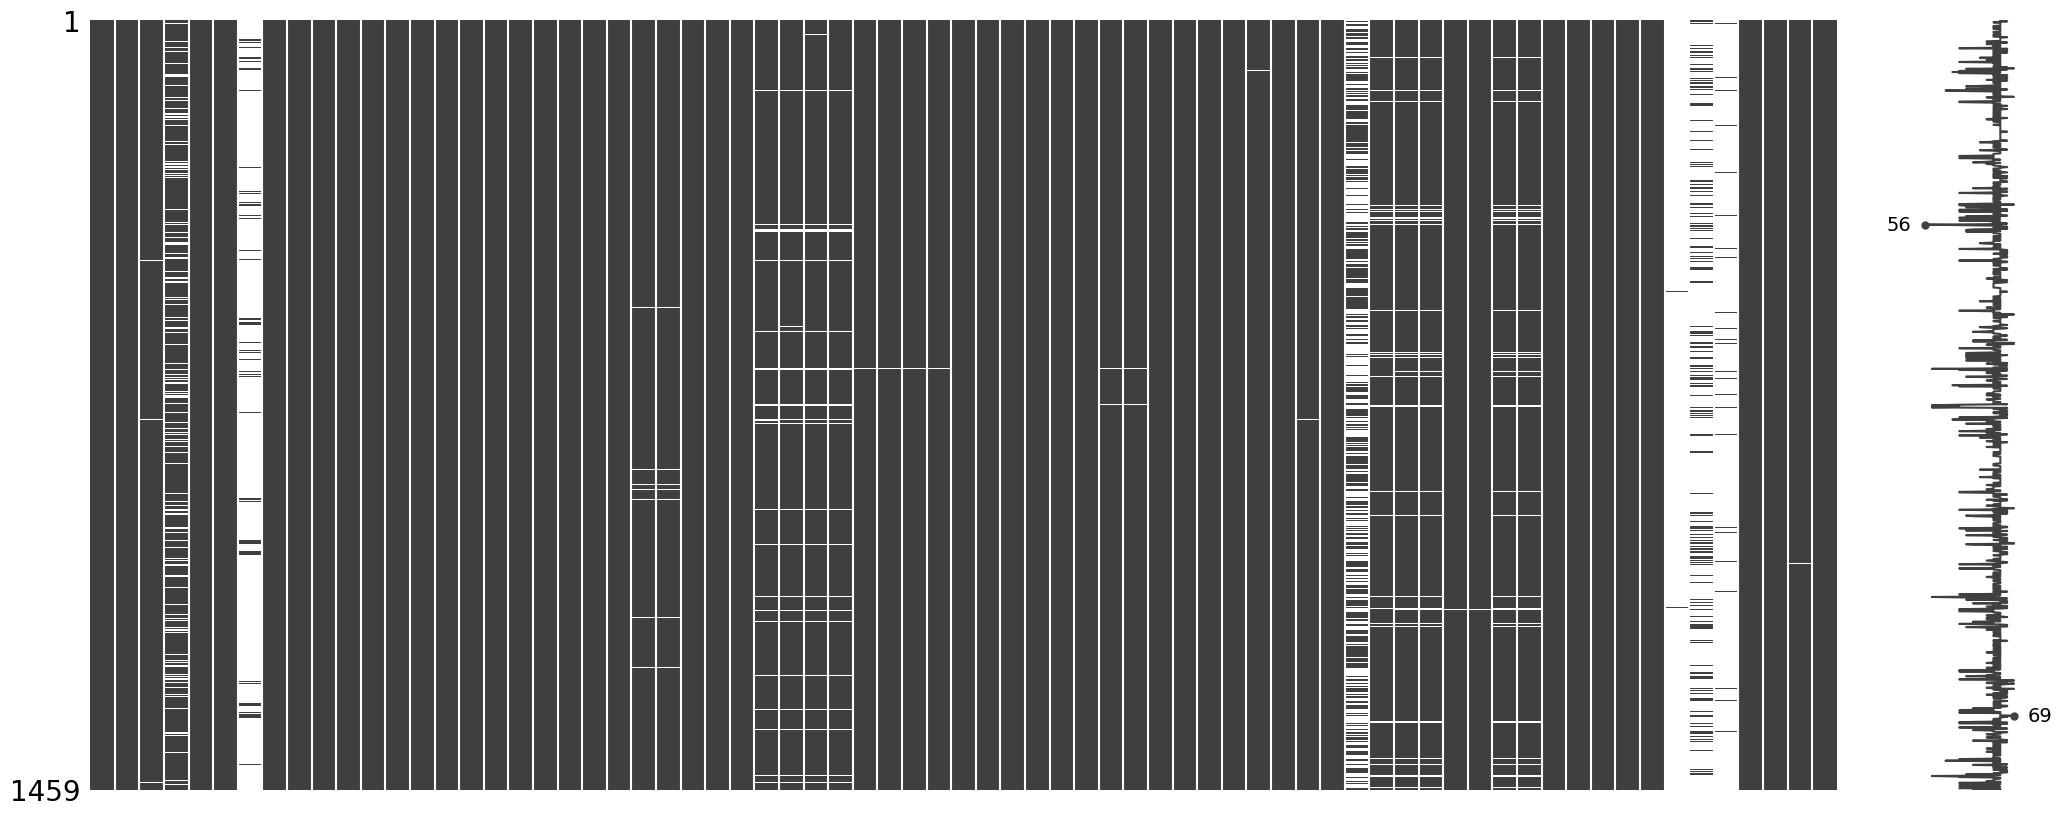

In [26]:
# Visualizing the missing data for the test dataset
msno.matrix(test)

As we can see from the missing values matrix above, there are 5 features that just have too many missing values to work with. Therefore, I will be dropping these 5 features. We can see from the other code previous to the matrix that these 5 features are: Alley, PoolQC, Fence, MiscFeature, and FireplaceQu.

In [27]:
# Dropping features with too many missing values
train.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'], axis = 1, inplace = True)
test.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'], axis = 1, inplace = True)

In [28]:
# Here are the categorical and discrete numerical features with missing values (for both train and test)
missing_feat = ['GarageType', 'GarageFinish','GarageCond', 'GarageQual', 'BsmtFinType1',
                'BsmtQual', 'BsmtCond', 'BsmtExposure', 'MasVnrType', 'Electrical', 'MSZoning',
                'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'Exterior1st', 'Exterior2nd',
                'KitchenQual', 'GarageCars', 'SaleType']

# Fill in the missing values with the mode with each respective feature
for feat in missing_feat:
    train[feat].fillna(train[feat].mode()[0], inplace = True)
    test[feat].fillna(train[feat].mode()[0], inplace = True)

# Here are the numerical features with missing values (for both train and test)
missing_feat = ['GarageYrBlt', 'MasVnrArea', 'LotFrontage',
                'BsmtUnfSF','BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'GarageArea']

# Fill in the missing values with the mean with each respective feature
for feat in missing_feat:
    train[feat].fillna(float(round(train[feat].mean())), inplace=True)
    test[feat].fillna(float(round(train[feat].mean())), inplace=True)

In [29]:
# Checking to see if there are any more missing values
train.isnull().sum()[train.isnull().sum() > 0].sort_values(ascending = False)

Series([], dtype: int64)

<Axes: >

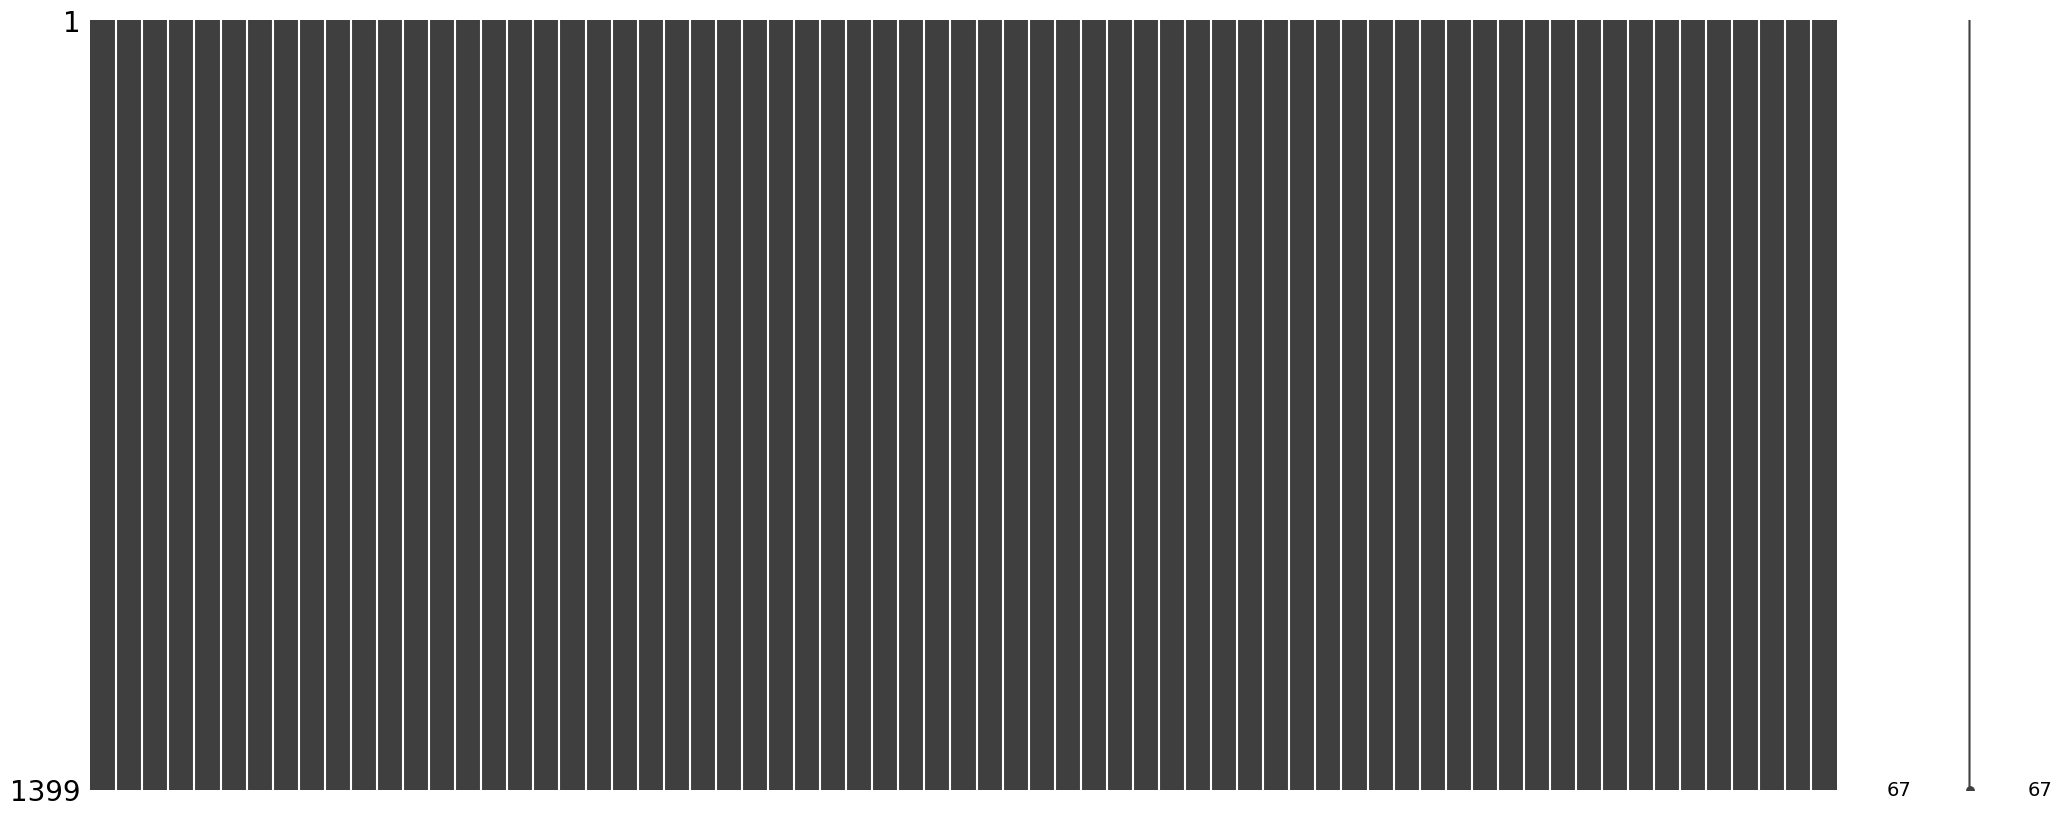

In [30]:
# Visualizing the now non-existent missing values for train
msno.matrix(train)

<Axes: >

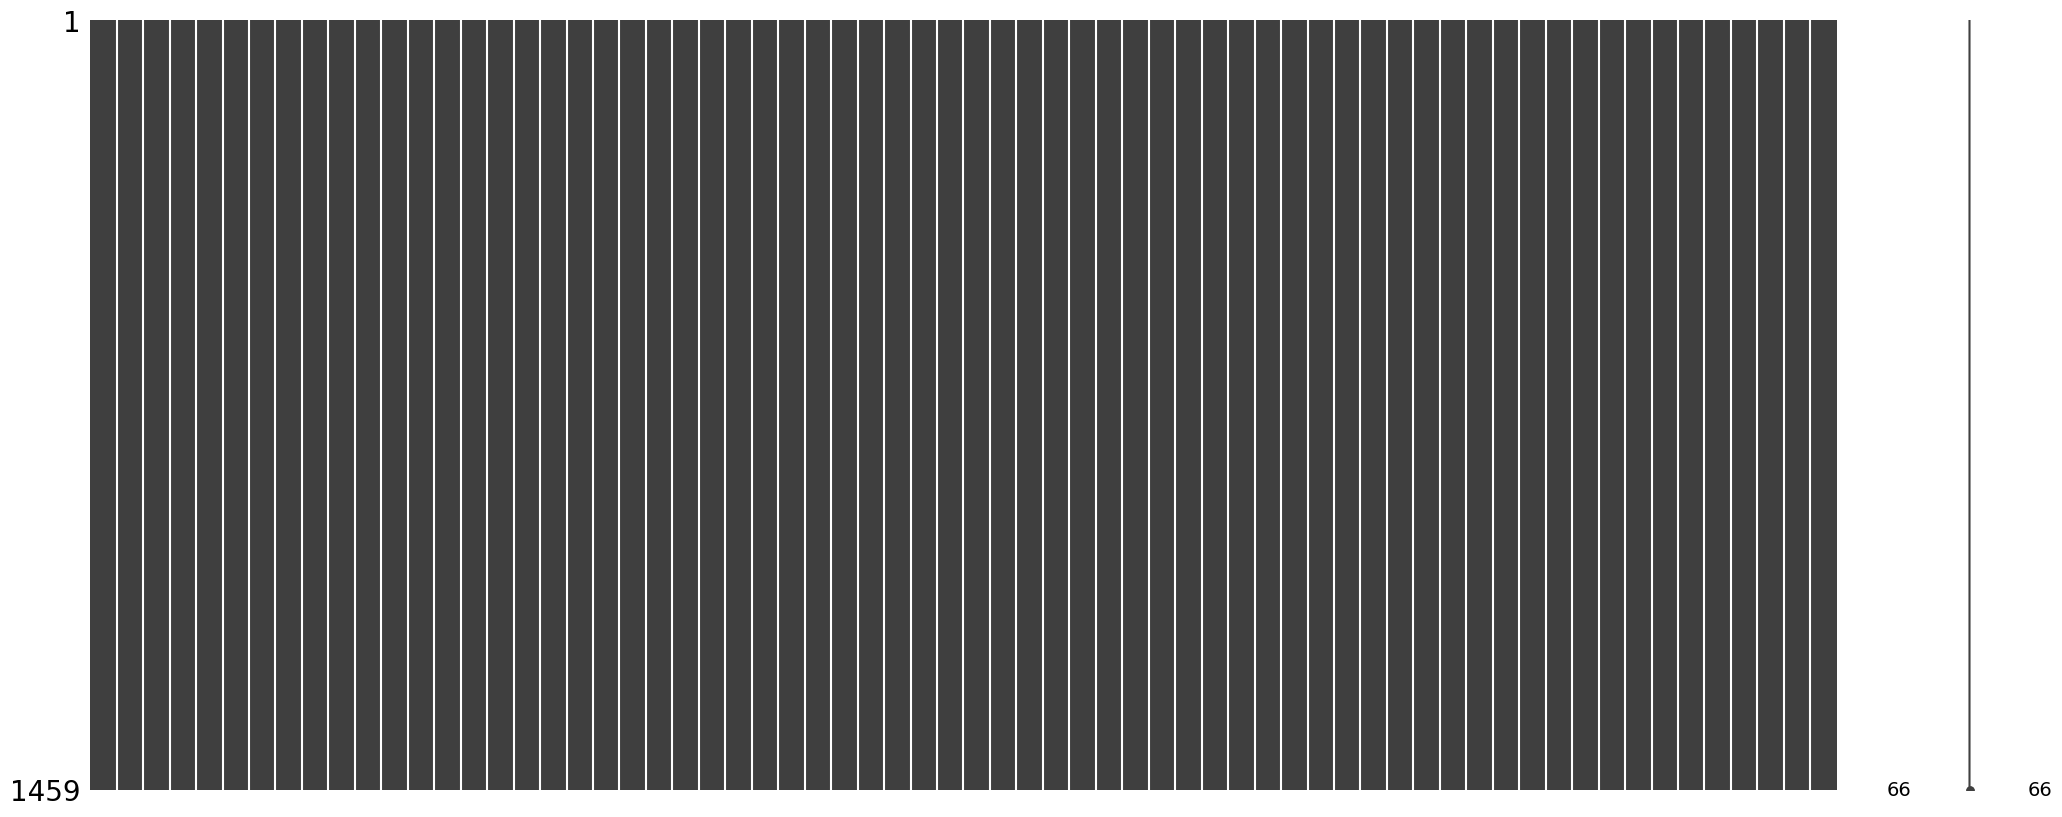

In [31]:
# Visualizing the now non-existent missing values for test
msno.matrix(test)

As we can see now, there are no more missing values!

## Categorical Features

In [32]:
# Defining the categorical features
cat_features = train.select_dtypes(include = 'object').columns

# Creating dummy variables for the categorical features
train = pd.get_dummies(train, columns=cat_features, drop_first=True)
test = pd.get_dummies(test, columns=cat_features, drop_first=True)

In [33]:
# Seeing if there is any features that are missing in the test set compared to the train set
print(train.columns.difference(test.columns))

Index(['Electrical_Mix', 'Exterior1st_ImStucc', 'Exterior1st_Stone',
       'Exterior2nd_Other', 'GarageQual_Fa', 'HouseStyle_2.5Fin', 'SalePrice'],
      dtype='object')


In [34]:
# Since there is, we will go ahead and fill in these features with zero in the test set
missing_feats = ['Electrical_Mix', 'Exterior1st_ImStucc', 'Exterior1st_Stone',
                 'Exterior2nd_Other', 'GarageQual_Ex', 'HouseStyle_2.5Fin']

for feat in missing_feats:
    test[feat] = np.zeros((1459,1))

# Sanity check
I will be conducting a simply train test split on the train dataset exclusively to ensure that the data cleaning I've conducted is good enough.

In [35]:
# Creating a temporary dataframe for the sanity check
df = train

# Metrics
rmse = [] # Root mean squared error
rmspe = [] # Root mean squared percentage error
mae = [] # Mean absolute error
rsquared = [] # R squared value
adj_rsquared = [] # Adjusted R squared value
evs = [] # Explained variance score

# Looping through 100 different samples and finding the mean for the metrics
for i in range(1,101):
    X = df.drop(['Id', 'SalePrice'], axis = 1).values
    y = df['SalePrice'].values
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=i)
    lm = LinearRegression() # Creating an instance of LinearRegression
    lm.fit(X_train, y_train) # Fitting the model
    predictions = lm.predict(X_test) # Predicting the values
    
    # Metrics
    rmse.append(np.sqrt(mean_squared_error(y_test, predictions)))
    rmspe.append(np.sqrt(np.mean(np.square((y_test - predictions) / y_test))) * 100)
    mae.append(mean_absolute_error(y_test, predictions))
    rsquared.append(r2_score(y_test, predictions))
    adj_rsquared.append(1-((1-r2_score(y_test, predictions))*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
    evs.append(explained_variance_score(y_test, predictions))

# Model evaluation
print("Mean of rmse:", round(sum(rmse)/ len(rmse),2))
print("Mean of rmspe:", round(sum(rmspe)/len(rmspe),2))
print("Mean of mae:", round(sum(mae)/len(mae),2))
print("Mean of rsquared:", round(sum(rsquared)/len(rsquared),2))
print("Mean of adjusted rsquared:", round(sum(adj_rsquared)/len(adj_rsquared),2))
print("Mean of evs:", round(sum(evs)/len(evs),2))

Mean of rmse: 25482.43
Mean of rmspe: 17.16
Mean of mae: 16376.82
Mean of rsquared: 0.81
Mean of adjusted rsquared: 0.64
Mean of evs: 0.81


# Model and Prediction

In [36]:
# Taking the log of the SalePrice values as required
train['SalePrice'] = np.log1p(train['SalePrice'])

In [37]:
# Defining X_train, y_train
X_train = train.drop(['Id', 'SalePrice'], axis=1).values
y_train = train['SalePrice'].values

# Defining X_test
X_test = test.drop('Id', axis=1).values

## Linear Regression

In [38]:
lm = LinearRegression() # Creating an instance of LinearRegression
lm.fit(X_train, y_train) # Fitting the model
predictions = lm.predict(X_test) # Predicting the values

In [39]:
result = pd.DataFrame(test['Id'])
result['SalePrice'] = np.round(np.exp(predictions),2)
result.head()

,Id,SalePrice
0,1461,176940.76
1,1462,195672.88
2,1463,222923.83
3,1464,300294.25
4,1465,241778.52


# Saving the result

In [40]:
result.to_csv('submission.csv',index=False)

# Conclusion
In this notebook, I have conducted EDA to see the relationship between the features of the dataset against *SalePrice*. More importantly, we were able to find out which features are bad for the model that we created at the end. This is done by flagging features with high class imbalance, low correlation w.r.t *SalePrice*, and high skewness for the continuous numerical features.

Then, we did some data cleaning by dropping features that were flagged as well as features that had too many missing values. For features with only some missing values, we conducted target encoding on those features by filling in the missing values with either the mean or the mode of the feature for numerical and categorical features respectively. Furthermore, we also dropped the outliers in the train dataset in this section to ensure that those outliers do not skew our model in a negative manner.

After our data cleaning, we did some feature engineering by conducted one hot encoding (dummy features) for the categorical features. We also filled in any missing values in the test dataset with zeros in this section to make sure that the test dataset has the same shape as the train dataset after one hot encoding.

We then conducted a sanity check by running a train test split on the train dataset over 100 different samples and recording the metrics of the linear regression model. Through this, we then took the mean of each metric to show that we are on the right track.

Finally, we build a linear regression model using the train dataset and created predictions of the *SalePrice* based on the test dataset.

As a summary, here's the best process that we found for this dataset as of now:
1. Drop features that have high class imbalance, low correlation w.r.t SalePrice, high skewness
2. Drop outliers
3. Drop features with too many missing values
4. Fill in missing values with mode and mean
5. Conduct one hot encoding on categorical features
6. Fill in zeros for features in the test set that initially only existed in the train set to ensure they have the same shape